## Guided Project 04_Storytelling Data Visualization on Exchange Rates

If you have ever travelled between the US and Europe, you know that exchange rates can affect your spending power. In the analysis below, we want to understand how the euro-dollar rate changed in the last 20 years.

In [4]:
# import libraries 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_theme()
import matplotlib.style as style
import re

In [5]:
# import files and make copies

euro_data = pd.read_csv('euro-daily-hist_1999_2020.csv.zip')
exchange_rates = euro_data.copy()

In [6]:
# getting started

exchange_rates.info() 
# print('Head and Tail Test:', euro.head(), '\n', '\n', '\n', euro.tail())
exchange_rates.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5754 non-null   object 
 1   [Australian dollar ]      5754 non-null   object 
 2   [Bulgarian lev ]          5352 non-null   object 
 3   [Brazilian real ]         5486 non-null   object 
 4   [Canadian dollar ]        5754 non-null   object 
 5   [Swiss franc ]            5754 non-null   object 
 6   [Chinese yuan renminbi ]  5486 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5754 non-null   object 
 9   [Danish krone ]           5754 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5754 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5754 non-null   object 
 14  [Croatia

,[Iceland krona ],[Romanian leu ],[Turkish lira ]
count,3347.000000,5692.000000,5692.000000
mean,101.646182,3.877739,2.749620
std,32.909584,0.863913,1.954428
min,68.070000,1.291200,0.370100
25%,81.335000,3.517975,1.686250
50%,87.970000,4.219750,2.115450
75%,123.400000,4.485325,3.105300
max,305.000000,4.889300,10.148900


### Observations:

- 41 columns, 5754 rows
- There is missing data in various columns
- Action: Data types are mostly objects; columns will need to be converted to float64. 

# Data Cleaning

In [10]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', ignore_index=True,
                           inplace=True)

# US dollar analysis
euro_to_dollar = pd.concat([exchange_rates['Time'], exchange_rates['US_dollar']], axis =1)
# print(euro_to_dollar.head(), '\n', '\n')
# print(euro_to_dollar['US_dollar'].value_counts()) # there are several columns with '-' as the designated value, let's drop them

euro_to_dollar_bool = euro_to_dollar['US_dollar'] != '-'
euro_to_dollar = euro_to_dollar[euro_to_dollar_bool]
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
# print(euro_to_dollar.info())

euro_to_dollar['Year'] = euro_to_dollar['Time'].dt.year
euro_to_dollar['Month'] = euro_to_dollar['Time'].dt.month
euro_to_dollar['Day'] = euro_to_dollar['Time'].dt.day


# print(euro_to_dollar)

# rolling window - let's see how the data breaks down by year, month and week
euro_by_year = euro_to_dollar.groupby('Year').mean()
euro_by_month = euro_to_dollar.groupby('Month').mean()
euro_by_week = euro_to_dollar['US_dollar'].rolling(7).mean()

print(euro_by_year)

      US_dollar     Month        Day
Year                                
1999   1.065776  6.555985  15.617761
2000   0.923613  6.494118  15.752941
2001   0.895630  6.480315  15.763780
2002   0.945574  6.521569  15.749020
2003   1.131160  6.529412  15.760784
2004   1.243902  6.575290  15.818533
2005   1.244090  6.548638  15.603113
2006   1.255599  6.490196  15.764706
2007   1.370478  6.501961  15.878431
2008   1.470755  6.519531  15.726562
2009   1.394782  6.566406  15.796875
2010   1.325717  6.596899  15.771318
2011   1.391955  6.540856  15.626459
2012   1.284789  6.484375  15.867188
2013   1.328118  6.521569  15.749020
2014   1.328501  6.529412  15.760784
2015   1.109513  6.566406  15.851562
2016   1.106903  6.552529  15.642023
2017   1.129681  6.490196  15.764706
2018   1.180955  6.505882  15.811765
2019   1.119475  6.517647  15.705882
2020   1.142196  6.544747  15.902724
2021   1.206340  2.000000  14.500000


# Data Visualization

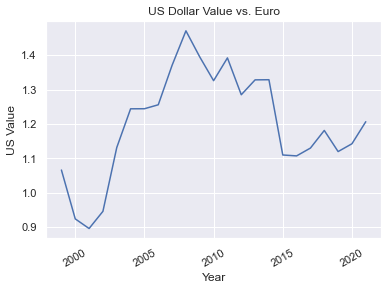

In [15]:
plt.plot(euro_by_year.index, euro_by_year['US_dollar'])
plt.title('Euro Value Compared to US Dollar')
plt.xlabel('Year')
plt.ylabel('US Value')
plt.xticks(rotation=30)
plt.show()

# Conclusion

The euro-dollar rate experienced considerable lows in the early 2000's, due to immense uncertainty following the US  September 11th Terrorist Attacks. After an eight year ascend, the data shows another drop due to the 2008 financial crisis. This results in a downward trend, with an immense drop on 2015 with the November 2015 Paris attacks coordinated Islamist terrorist. As the war between Russia and Ukraine continues, I expect the euro-dollar rate to decline as the worldstage reaches higher levels of uncertainty. 